### Data Analysis Project Life Cycle
- **Business Problem Understanding**
- **Data Collection**
- **Data Pre-Processing**
- **Exploratory Data Analytics**
- **Reporting**

### Business Understanding
**Client wants us to analyze their diwali sale data to understand the trend, top performing product, categories so that they can be better prepared and utilise the insights to increase their sale**

### Data Collection
 - **Client has provided the historical data in csv format**
 - Dataset Link: https://drive.google.com/file/d/1mGY1doT8RRTgIS0eZsiexHOjUIel9pvo/view?usp=sharing

In [17]:
# Importing the liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Fetching the data
data_path = r'C:\Work\YouTube\Diwali_Sales_Data\Diwali_Sales_Data.csv'
data = pd.read_csv(data_path, encoding='unicode_escape')
data.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952,NaN,NaN
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra2adesh,Southern,Govt,Auto,3.0,23934,NaN,NaN


In [37]:
# Creating the copy of dataset
df = data.copy()

### Data Pre-Processing
- **Data Profilling**
- **Data Cleaning**
- **Data Consistancy**
- **Data Formating**
- **Outlier Detaction & Removal**

In [38]:
# data shape
df.shape

(11345, 15)

In [39]:
# Feature details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11321 non-null  float64
 1   Cust_name         11344 non-null  object 
 2   Product_ID        11341 non-null  object 
 3   Gender            11341 non-null  object 
 4   Age Group         11339 non-null  object 
 5   Age               11334 non-null  object 
 6   Marital_Status    11339 non-null  float64
 7   State             11332 non-null  object 
 8   Zone              11334 non-null  object 
 9   Occupation        11339 non-null  object 
 10  Product_Category  11334 non-null  object 
 11  Orders            11342 non-null  float64
 12  Amount            11331 non-null  object 
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [43]:
# Checking null values
df_null = df.isnull().sum()

# Null value as percentage
df_null_percentage = (df.isna().sum()/(df.shape[0])) * 100
null_values = pd.DataFrame({'null_value': df_null, 'percentage': df_null_percentage})
null_values

,null_value,percentage
User_ID,24,0.211547
Cust_name,1,0.008814
Product_ID,4,0.035258
Gender,4,0.035258
Age Group,6,0.052887
Age,11,0.096959
Marital_Status,6,0.052887
State,13,0.114588
Zone,11,0.096959
Occupation,6,0.052887


In [44]:
# Columns name
all_column = df.columns
all_column

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [46]:
# Numeric Column
numeric_column = df.select_dtypes(include = np.number).columns
numeric_column

Index(['User_ID', 'Marital_Status', 'Orders', 'Status', 'unnamed1'], dtype='object')

In [47]:
# Non-Numeric Column
object_column = df.select_dtypes(include = object).columns
object_column

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Amount'],
      dtype='object')

In [48]:
# Checking duplicate value
df_duplicate = df[df.duplicated()]
print("Duplicate dataset shape is: ", df_duplicate.shape)
df_duplicate.head()

Duplicate dataset shape is:  (40, 15)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
4404,1004725.0,Jackson,P00150842,F,36-45,37,1.0,Maharashtra,Western,Hospitality,Electronics & Gadgets,4.0,9859,NaN,NaN
5703,1003208.0,Bowman,P00171642,F,26-35,31,0.0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4.0,8088,NaN,NaN
5908,1001260.0,Dheeraj,P00344042,M,26-35,28,0.0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4.0,8015,NaN,NaN
6173,1001325.0,Reese,P00111742,F,26-35,27,1.0,Gujarat,Western,Construction,Electronics & Gadgets,3.0,7923,NaN,NaN
8651,1000083.0,Gute,P00242842,M,26-35,35,0.0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3.0,5345,NaN,NaN


In [49]:
# Filtering out the duplicate entries
df = df[~df.duplicated()]
print('Non-Duplicate data set shape is: ', df.shape)

# Checking if any duplicate exists
df[df.duplicated()]

Non-Duplicate data set shape is:  (11305, 15)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1


### Data Profilling
- **Amount**
    - We need to change the data type from object to integer
    - The rows corresponding to null values should be dropped
    - Need to drops the rows corresponding the values abcde
- **Status & Unnamed1**
    - No data should be dropped
- **Orders**
    - Null values has to be drop
    - Their is Outliers which can be removed
- **State**
    - 'Andhra2adesh', 'Nndhra2adesh'change with 'AndhraPradesh'
    - Drop the rows corresponding the null values
- **Zone**
    - Drop the rows corresponding the null values
    - Zentral should be replaced with Central
- **Product_id**
    - Drop the rows corresponding the null values
- **Marital Status**
   - Null values can be replaced with mode
   - '1' can be replaced with 'Married'
   - '0' can be replaced with 'Unmarried
   - will create a new column with this
- **Age**
   - 'Age' value can be replaced with mode
   - Null values can be changed with mode
   - Data type needs to be change with object to numeric
- **Age Group**
  - 'low-high' value can be replaced with mode
  - Null values can be changed with mode
- **Product Category**
    - Null values can be dropped
- **User_ID, Product_ID, Gender**
    - Can be replaced with mode values of repective column


### Data Cleaning

In [50]:
# Dropping the columns: Status & unmamed1
df.drop(['Status' , 'unnamed1'], axis = 1, inplace = True)
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra2adesh,Southern,Govt,Auto,3.0,23934


In [51]:
# changing the data type
df['Amount'] = pd.to_numeric(df['Amount'], errors ='coerce') # errors ='coerce' will change non-numeric values to nan
df['Amount'].dtypes

dtype('float64')

In [52]:
# Dropping the null values in the columns[ Amount,Orders, State, Zone, Product_id, Product_category]
df.dropna(subset = ['Amount','Orders', 'State', 'Zone', 'Product_ID', 'Product_Category'], inplace = True)

#### State & Zone

In [53]:
df['State'].unique()

array(['Maharashtra', 'Andhra2adesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Nndhra2adesh', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Haryana',
       'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

In [54]:
# Replacing Andhra2adesh & Nndhra2adesh with Andhra Pradesh
df['State'] = df['State'].str.replace('Andhra2adesh', 'Andhra Pradesh')
df['State'] = df['State'].str.replace('Nndhra2adesh', 'Andhra Pradesh')

In [55]:
df['State'].unique()

array(['Maharashtra', 'Andhra Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Haryana', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

#### Zone

In [56]:
df['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Zentral', 'Eastern'],
      dtype=object)

In [57]:
# Replacing Zentral with Central
df['Zone'] = df['Zone'].str.replace('Zentral', 'Central')

In [58]:
df['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

#### Marital_Status

In [59]:
# Replacing the values with mode
marital_status_mode = df['Marital_Status'].mode()[0]
marital_status_mode

0.0

In [60]:
df['Marital_Status']= df['Marital_Status'].fillna(marital_status_mode)

In [61]:
df['Marital_Status'].isna().sum()

0

In [62]:
df['Marital_Status'].unique()

array([0., 1.])

In [63]:
# Creating a new column with marital_status
df['Marriage_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1. else 'Unmarried')

In [64]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Marriage_Status
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,Unmarried
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,Married


#### Age

In [65]:
# Converting datatype from object to numeric.
df['Age'] = pd.to_numeric(df['Age'], errors ='coerce')
df['Age'].dtypes

dtype('float64')

In [66]:
# Replacing the null value with mode
age_mode = df['Age'].mode()[0]
df['Age']= df['Age'].fillna(age_mode)

#### Age Group

In [67]:
# Replacing null values with mode
age_group_mode = df['Age Group'].mode()[0]
age_group_mode
df['Age Group'] = df['Age Group'].str.replace('low-high',age_group_mode)
df['Age Group'] = df['Age Group'].fillna(age_group_mode)

#### Gender & Occupation

In [68]:
# Replacing null values with mode
gender_mode = df['Gender'].mode()[0]
occupation_mode = df['Occupation'].mode()[0]
df['Gender'] = df['Gender'].fillna(gender_mode)
df['Occupation'] = df['Occupation'].fillna(occupation_mode)

#### User id

In [69]:
# Replacing null values with mode
user_id_mode = df['User_ID'].mode()[0]
df['User_ID'] = df['User_ID'].fillna(user_id_mode)

In [70]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
Marriage_Status     0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11254 entries, 0 to 11340
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11254 non-null  float64
 1   Cust_name         11254 non-null  object 
 2   Product_ID        11254 non-null  object 
 3   Gender            11254 non-null  object 
 4   Age Group         11254 non-null  object 
 5   Age               11254 non-null  float64
 6   Marital_Status    11254 non-null  float64
 7   State             11254 non-null  object 
 8   Zone              11254 non-null  object 
 9   Occupation        11254 non-null  object 
 10  Product_Category  11254 non-null  object 
 11  Orders            11254 non-null  float64
 12  Amount            11254 non-null  float64
 13  Marriage_Status   11254 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


## Outlier detection & removal

In [72]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125400e+04,11254.000000,11254.000000,11254.000000,1.125400e+04
mean,1.013664e+06,35.424382,0.419762,2.494135,1.916697e+05
std,3.263686e+05,12.753259,0.493542,1.186925,1.072906e+07
min,1.000001e+06,12.000000,0.000000,1.000000,1.880000e+02
25%,1.001496e+06,27.000000,0.000000,2.000000,5.445000e+03
50%,1.003064e+06,33.000000,0.000000,2.000000,8.113000e+03
75%,1.004430e+06,43.000000,1.000000,3.000000,1.269900e+04
max,1.100505e+07,92.000000,1.000000,40.000000,8.760212e+08


Text(0.5, 1.0, 'Box plot for AMOUNT')

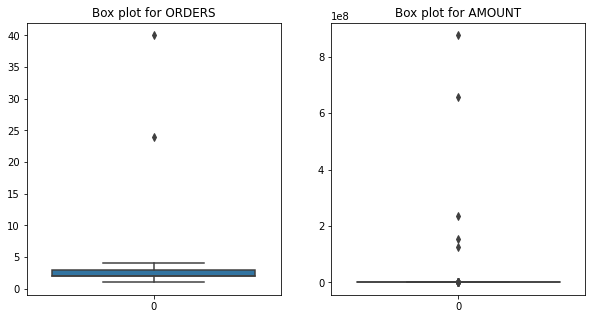

In [73]:
# Visualization of outlier
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(data = df['Orders'], ax = ax[0])
ax[0].set_title('Box plot for ORDERS')
sns.boxplot(data = df['Amount'], ax = ax[1])
ax[1].set_title('Box plot for AMOUNT')

#### Orders

In [75]:
# Quartile & Limits
q1_orders = np.quantile(df['Orders'], 0.25)
q3_orders = np.quantile(df['Orders'], 0.75)
IQR_orders = q3_orders - q1_orders
print("Quartile1: ", q1_orders)
print("Quartile3: ", q3_orders)
print("IQR: ", IQR_orders)

#IQR_orders
lower_limit_order = q1_orders - 1.5* IQR_orders
upper_limit_order = q3_orders + 1.5* IQR_orders
print("lower limit: ", lower_limit_order)
print("upper limit: ", upper_limit_order)

Quartile1:  2.0
Quartile3:  3.0
IQR:  1.0
lower limit:  0.5
upper limit:  4.5


In [76]:
# Removing the outliers
df = df[(df['Orders'] > lower_limit_order) & (df['Orders'] < upper_limit_order)]
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Marriage_Status
0,1002903.0,Sanskriti,P00125942,F,26-35,28.0,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,Unmarried
1,1000732.0,Kartik,P00110942,F,26-35,35.0,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,Married


In [78]:
# Quartile & Limits
q1_amount = np.quantile(df['Amount'], 0.25)
q3_amount = np.quantile(df['Amount'], 0.75)
IQR_amount = q3_amount - q1_amount
print('Quartile1: ', q1_amount)
print('Quartile3: ', q3_amount)
print('IQR: ', IQR_amount)

lower_limit_amount = q1_amount - 1.5* IQR_amount
upper_limit_amount = q3_amount + 1.5* IQR_amount
print('lower limit: ', lower_limit_amount)
print('upper limit: ', upper_limit_amount)

Quartile1:  5444.75
Quartile3:  12699.0
IQR:  7254.25
lower limit:  -5436.625
upper limit:  23580.375


In [80]:
# Removing the outliers
df = df[(df['Amount'] > lower_limit_amount) & (df['Amount'] < upper_limit_amount)]
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Marriage_Status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married


In [81]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


### Cleaned Data

In [82]:
df.to_csv('C:\Work\YouTube\Diwali_Sales_Data\data_cleaned.csv')